<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab06_ec_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ecuaciones de una variable:

Para los siguiente problemas:


1.0 ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

- Muestre que la expresión que permite resolver el problema:


\begin{equation}
\theta - \sin \theta = \frac{\pi}{2}
\end{equation}


- ¿Construya una grafica para theta?,  Alrededor de que punto esta solución.(Para este punto se recomienda emplear un data frame de pandas )

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobar la solución intuida del apartado anterior.


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force
of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the
object after t seconds is

\begin{equation}
s(t)=s_0 - \frac{mg}{k}t+\frac{m^2g}{k}t(1-e^{-kt/m})
\end{equation}

where $g = 32.17 ft/s2$ and $k$ represents the coefficient of air resistance in $lbs/ft$. Suppose $s0 = 300 ft$,
$m = 0.25$ lb, and $k = 0.1$ lbs/ft. Find, to within $0.01$ s, the time it takes this quarter-pounder to hit the
ground

- Emplee el metodo de biseccion, punto fijo,  newton y secante  para comprobrar la solución.



3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.



5. Construir un fractal empleando el metodo de Newton-Raphson,
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)}
\end{equation}



\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}


Replicar el codigo y entender.


```

import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada
def f(z):
  return z**3 - 1

def fp(z):
  return 3*z**2

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h
  

a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
```


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

In [ ]:
tetha =lambda x: x-np.sin(x)-(np.pi/2)

In [ ]:
x = np.arange(0,2*np.pi, 0.01)
y = tetha(x)

In [ ]:
d = {"Theta": x, "Funcion": y}
df = pd.DataFrame(d)


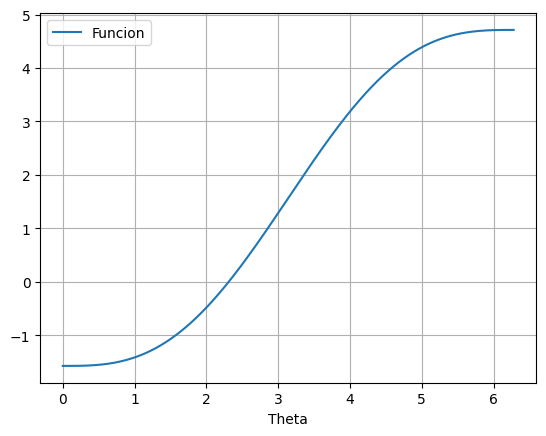

In [ ]:
df.plot.line(x = "Theta", y = "Funcion")
plt.grid()
plt.show()

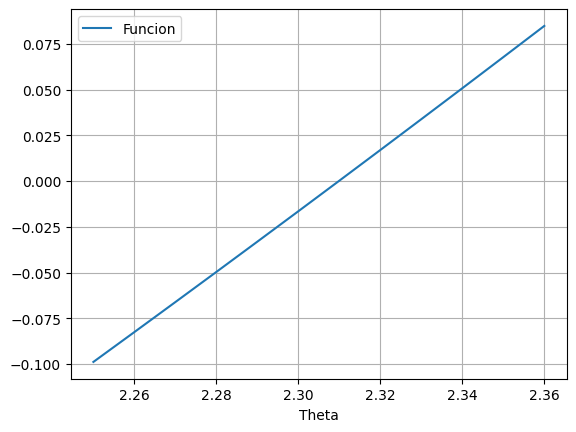

In [ ]:
df_filtro = df[df.Funcion.between(-0.1,0.1)]
df_filtro.plot.line(x= "Theta", y = "Funcion")
plt.grid()
plt.show()

In [ ]:
raiz = optimize.bisect(tetha, 2.30, 2.31)
print("Laraiz usando el metodo de Biseccion", raiz)

Laraiz usando el metodo de Biseccion 2.3098814600089104


In [ ]:
dtetha = lambda x: 1 - np.cos(x)

In [ ]:
raiz = optimize.newton(tetha, 2.3,dtetha)
print("la raiz usando el metodo de Newton", raiz)

la raiz usando el metodo de Newton 2.309881460010057


In [ ]:
fixed_tetha = lambda x: x- tetha(x)

raiz_fijo = optimize.fixed_point(fixed_tetha,2.30)

In [ ]:
print("la raiz usando el metodo de punto fijo", raiz_fijo)

la raiz usando el metodo de punto fijo 2.3098814600100575


In [ ]:
raiz_secante= optimize.newton(tetha,2.30)
print("la raiz usando el metodo de la secante", raiz_secante)

la raiz usando el metodo de la secante 2.3098814600100575


2.0 An object falling vertically through the air is subjected to viscous resistance as well as to the force of gravity. Assume that an object with mass m is dropped from a height s0 and that the height of the object after t seconds is

s(t)=s0−mgkt+m2gkt(1−e−kt/m)

where  g=32.17ft/s2  and  k  represents the coefficient of air resistance in  lbs/ft . Suppose  s0=300ft ,  m=0.25  lb, and  k=0.1  lbs/ft. Find, to within  0.01  s, the time it takes this quarter-pounder to hit the ground

Emplee el metodo de biseccion, punto fijo, newton y secante para comprobrar la solución.

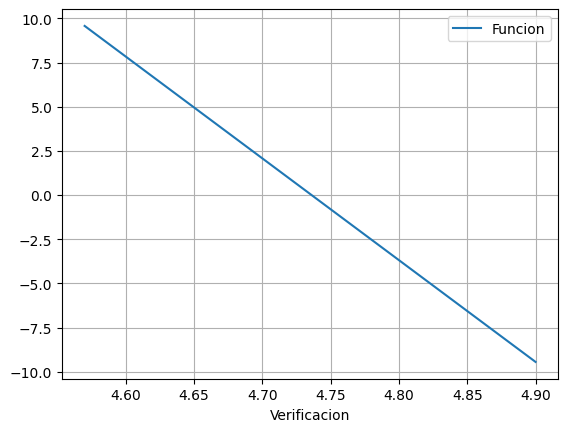

la raiz utilizando el metodo de biseccion es 4.736139137604914


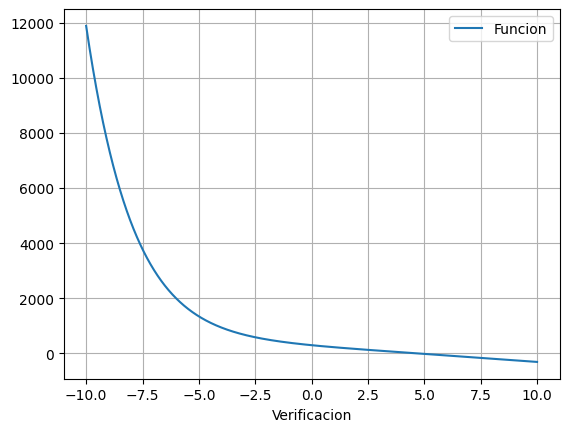

In [ ]:
g= 32.17
s0 = 300
m =0.25
k= 0.1
verificacion = lambda t: s0-((m*g)/k)*t+((m**2*g)/k)*t*(1-np.exp((-k*t)/m))
t = np.arange(-10, 10,0.01)
y = verificacion(t)
d = {"Verificacion": t, "Funcion": y}
df = pd.DataFrame(d)
df_filtro = df[df.Funcion.between(-10,10)]
df_filtro.plot.line(x= "Verificacion", y = "Funcion")
plt.grid()
plt.show()
raiz = optimize.bisect(verificacion, 4.70, 4.80)
print("la raiz utilizando el metodo de biseccion es",raiz)
x = np.arange(-10,10, 0.01)
y = verificacion(t)
d = {"Verificacion": x, "Funcion": y}
df = pd.DataFrame(d)
df.plot.line(x = "Verificacion", y = "Funcion")
plt.grid()
plt.show()

In [ ]:
#punto fijo
fixed_fun = lambda t: t-verificacion(t)
raiz_fijo = optimize.fixed_point(fixed_fun,4.8)
print("la raiz usando el metodo de punto fijo es",raiz_fijo)

la raiz usando el metodo de punto fijo es 4.73613913760349


In [ ]:
#metodo de newton Rapshon
dverificacion = lambda t: -(m*g)/k+((m**2*g)/k)*(1-np.exp(-(k*t)/m)+(((m**2*g*t)/k)*((-k/m)*np.exp(-(k*t)/m))))
raiz = optimize.newton(verificacion, 4.80,dverificacion)
print("la raiz usando el metodo de Newton", raiz)

la raiz usando el metodo de Newton 4.736139161005768


3.0 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:

a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

d. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.


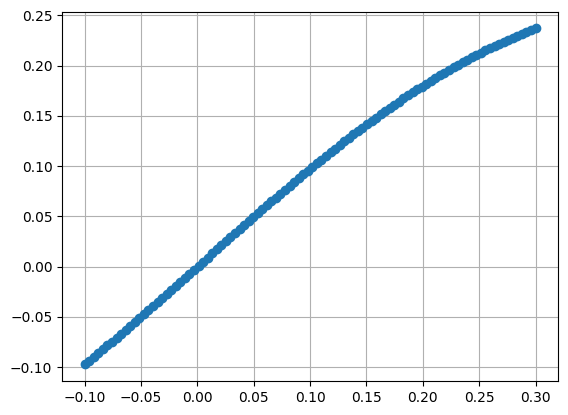

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

func = lambda m: np.tanh(m/T)-m
m = np.linspace(-0.1,0.3,100)
T = 0.5
plt.plot(m,func(m), "o")
plt.grid()
#m_secante = optimize.newton(func, 0.1)
#print("la magnetizacion usando el metodo de la secante", m_secante)


a)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
def func(m,T):
  return np.tanh(m/T)-m
T = 0.5
m_secante = optimize.newton(func, x0=0.1, args=(T,))
print("La Magnetización reducida usando método de la secante: {:.4f}".format(m_secante))

La Magnetización reducida usando método de la secante: 0.0000


b)

In [28]:
def verificacion(m,T):
  return np.tanh(m/T)
T = 0.5
m_punto_fijo = optimize.fixed_point(verificacion,x0=0.1,args=(T,))
print("La Magnetización reducida usando método del punto fijo: {:.4f}".format(m_punto_fijo))

La Magnetización reducida usando método del punto fijo: 0.0000


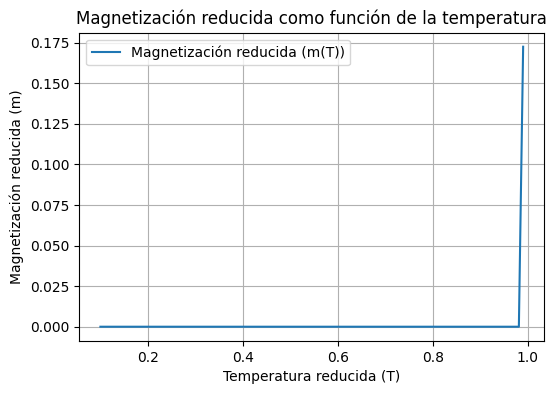

In [33]:
T_valores=np.linspace(0.1,0.99,100)
m_valores=[]
for T in T_valores:
  m_secante = optimize.newton(func, x0=0.1, args=(T,))
  m_valores.append(m_secante)
plt.figure(figsize=(6, 4))
plt.plot(T_valores, m_valores, label='Magnetización reducida (m(T))')
plt.xlabel('Temperatura reducida (T)')
plt.ylabel('Magnetización reducida (m)')
plt.title('Magnetización reducida como función de la temperatura')
plt.grid(True)
plt.legend()
plt.show()

replicaremos este codigo con la funcion f(z) = 2z*5-4

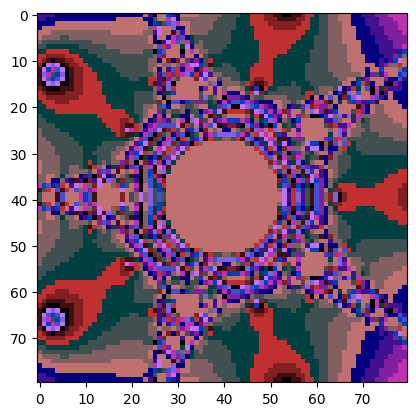

In [35]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
# Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

# Definicion  la funcion y las derivada
def f(z):
  return 2*z**5 - 4

def fp(z):
  return 10*z**4

h = 1E-4
def fpn(z, h):
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1
  y = -1
  for zy_ in zy:
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones):
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break

        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16

      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
# plt.xlim(400, 600)
# plt.ylim(400, 523)